# Class: Data Science Fundamentals 3125
# Final Project Topic: Stock Market ETF Comparison
# Student: Luis Gjuraj

# Introduction

The purpose of this project is to practice what we have learned so far from the Pandas, NumPy and sklearn libraries to our advantage while analyzing data. We have been given freedom to do as we please as long as we are able to show what we have learned.

The topic I chose is stock market analysis. Using what we have learned in class with available online libraries, we are able to pull market data into pandas dataframes, which we can then use to analyze stock data.

I thought this might be useful in a variety of purposes, such as Long Term Investing, Day Trading, Swing Trading, Stock Analysis, Market Predictions etc. Using this data, we can also compare certain stocks to their competitors to determine which might be best positioned for success at the moment, or which is the most undervalued in the industry.

In this instance though, I wanted to do something much more practical for the average investor. I wanted to compare some of the most popular ETFs in the market, and see how they fare against each other and the standard market indexes such as the S&P500, Dow Jones Industrial Average and Nasdaq.

# Selection of Data

The datasets that we are using are generated by using the library provided by Alpha Vantage. It is a company that provides essential data to analyze stock market, cryptocurrency and forex data. To extract useful datasets, I am using time series despite the suggested avoidance of them. It is the most efficient way of extracting stock prices.

The data is made up of 5 features: 
(by instance I mean the time in which the trades are happening. In our case, we will be looking at the monthy data, so each month will be an instance.)
0. date      - Date reported (functions as our index instead of integers)
1. open      - Price at the start of the instance
2. high      - Peak price in the instance
3. low       - Bottom price in the instance
4. close     - Price at the end of the intance
5. volume    - The number of shares that have been traded within the instance

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators

In [2]:
api_key = 'HVJV9539CILNEBVY'
ts = TimeSeries(api_key, output_format = 'pandas')
app = TechIndicators(api_key, output_format='pandas')

In [3]:
names = pd.Series(["SPY", "VUG", "UVXY", "SQQQ", "XLE"]) #later on we can make this a user input
for x in names:
    vars()[x], metadata = ts.get_monthly(symbol = x)

In [4]:
for x in names:
    vars()[x]['6. name'] = x
SPY['7. total_%'] = (SPY['4. close'] - SPY['1. open'][-1])*100/SPY['1. open'][-1]
VUG['7. total_%'] = (VUG['4. close'] - VUG['1. open'][-1])*100/VUG['1. open'][-1]
UVXY['7. total_%'] = (UVXY['4. close'] - UVXY['1. open'][-1])*100/UVXY['1. open'][-1]
SQQQ['7. total_%'] = (SQQQ['4. close'] - SQQQ['1. open'][-1])*100/SQQQ['1. open'][-1]
XLE['7. total_%'] = (XLE['4. close'] - XLE['1. open'][-1])*100/XLE['1. open'][-1]

In [5]:
data = pd.concat([SPY,VUG,UVXY,SQQQ,XLE], axis=0) # well make this automatic later... :D

# Methods

I used the Alpha Vantage API for gathering data. I used pandas for performing analysis on the data in the form of data selection, creating new data out of what I was given, finding values of interest.

I also used the Matplotlib to create plots of the dataframes that I previously compiled using pandas. While creating the graphs, I understood how misleading they can be if not double-checked. 

In [6]:
data['8. mon_%_change'] = (data['4. close']- data['1. open'])*100/data['1. open']
#data['8. total_%'] = (data['4. close'] - data['1. open'][-1])*100/data['1. open'][-1]     wrong o:<

In [7]:
data = data.sort_values(by = 'date', ascending = False) 
data.head(5)
#data[data['6. name'] == 'SPY']

,1. open,2. high,3. low,4. close,5. volume,6. name,7. total_%,8. mon_%_change
date,,,,,,,,
2021-12-10,461.64,470.90,448.92,470.74,8.025886e+08,SPY,237.902198,1.971233
2021-12-10,18.32,26.22,14.84,14.92,5.642115e+08,UVXY,-34.503951,-18.558952
2021-12-10,6.10,7.04,5.95,6.03,1.643255e+09,SQQQ,-91.412703,-1.147541
2021-12-10,319.69,323.00,304.44,321.33,7.464267e+06,VUG,546.539235,0.512997
2021-12-10,55.87,57.87,53.40,57.24,2.683646e+08,XLE,112.472160,2.452121


We now have our data. It is time to compare our ETFs to figure out which one has the best track record!

We could go about it in different ways. We could compare the data from 20, 10, and 5 years ago up until today. The reason for having different frames of refference is because a lot of things could change in the world very rapidly. (Like the creation of a new ETF :D)

We could figure out in which months one of them is more likely to have the biggest profit in a specific timeframe, so that we can include a rotation element to our portfolio in the future.

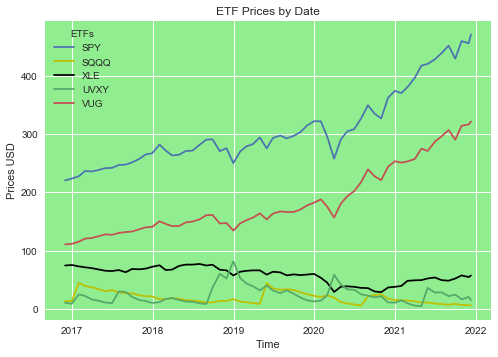

In [19]:
plt.style.use('seaborn')
plt.rcParams['axes.facecolor'] = 'lightgreen'
plt.plot(SPY.index, SPY['4. close'], label = 'SPY')
plt.plot(SQQQ.index, SQQQ['4. close'], label = 'SQQQ', color = 'y')
plt.plot(XLE.index, XLE['4. close'], label = 'XLE', color = 'black')
plt.plot(UVXY.index, UVXY['4. close'], label = 'UVXY')
plt.plot(VUG.index, VUG['4. close'], label = 'VUG')
plt.xlabel('Time')
plt.ylabel('Prices USD')
plt.title('ETF Prices by Date')
plt.legend(title = "ETFs", frameon = False)

After taking a look at the graph and the data, we see that in the 20 year time frame, the S&P500 has done overwhelmingly better than all of its competitors. But this is not a fair match. Excluding XLE, all other ETF funds were established later down the line. So what if we gave them the same starting point, would the percentages be different?

In [9]:
SPY = SPY[SPY.index > '2011-11-01']
VUG = VUG[VUG.index > '2011-11-01']
SQQQ= SQQQ[SQQQ.index > '2011-11-01']
XLE = XLE[XLE.index > '2011-11-01']
UVXY = UVXY[UVXY.index > '2011-11-01']
SPY['7. total_%'] = (SPY['4. close'] - SPY['1. open'][-1])*100/SPY['1. open'][-1]
VUG['7. total_%'] = (VUG['4. close'] - VUG['1. open'][-1])*100/VUG['1. open'][-1]
UVXY['7. total_%'] = (UVXY['4. close'] - UVXY['1. open'][-1])*100/UVXY['1. open'][-1]
SQQQ['7. total_%'] = (SQQQ['4. close'] - SQQQ['1. open'][-1])*100/SQQQ['1. open'][-1]
XLE['7. total_%'] = (XLE['4. close'] - XLE['1. open'][-1])*100/XLE['1. open'][-1]

In [10]:
data10 = pd.concat([SPY,VUG,UVXY,SQQQ,XLE], axis=0)
data10 = data10.sort_values(by = 'date', ascending = False) 

In [11]:
data10.head(5)

,1. open,2. high,3. low,4. close,5. volume,6. name,7. total_%
date,,,,,,,
2021-12-10,461.64,470.90,448.92,470.74,8.025886e+08,SPY,285.757601
2021-12-10,18.32,26.22,14.84,14.92,5.642115e+08,UVXY,-34.503951
2021-12-10,55.87,57.87,53.40,57.24,2.683646e+08,XLE,-14.541654
2021-12-10,6.10,7.04,5.95,6.03,1.643255e+09,SQQQ,-70.441176
2021-12-10,319.69,323.00,304.44,321.33,7.464267e+06,VUG,428.329497


In [13]:
data10[data10['7. total_%'] == data10['7. total_%'][:5].max()]#['6. name']

,1. open,2. high,3. low,4. close,5. volume,6. name,7. total_%
date,,,,,,,
2021-12-10,319.69,323.0,304.44,321.33,7464267.0,VUG,428.329497


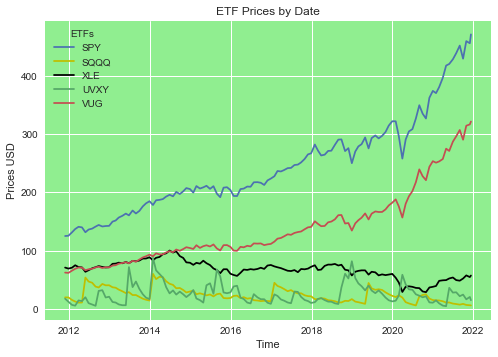

In [12]:
plt.style.use('seaborn')
plt.rcParams['axes.facecolor'] = 'lightgreen'
plt.plot(SPY.index, SPY['4. close'], label = 'SPY')
plt.plot(SQQQ.index, SQQQ['4. close'], label = 'SQQQ', color = 'y')
plt.plot(XLE.index, XLE['4. close'], label = 'XLE', color = 'black')
plt.plot(UVXY.index, UVXY['4. close'], label = 'UVXY')
plt.plot(VUG.index, VUG['4. close'], label = 'VUG')
plt.xlabel('Time')
plt.ylabel('Prices USD')
plt.title('ETF Prices by Date')
plt.legend(title = "ETFs", frameon = False)

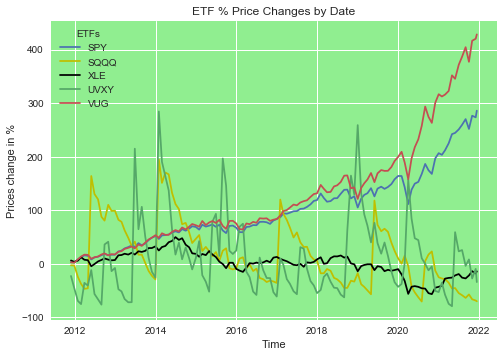

In [14]:
plt.style.use('seaborn')
plt.rcParams['axes.facecolor'] = 'lightgreen'
plt.plot(SPY.index, SPY['7. total_%'], label = 'SPY')
plt.plot(SQQQ.index, SQQQ['7. total_%'], label = 'SQQQ', color = 'y')
plt.plot(XLE.index, XLE['7. total_%'], label = 'XLE', color = 'black')
plt.plot(UVXY.index, UVXY['7. total_%'], label = 'UVXY')
plt.plot(VUG.index, VUG['7. total_%'], label = 'VUG')
plt.xlabel('Time')
plt.ylabel('Prices change in %')
plt.title('ETF % Price Changes by Date')
plt.legend(title = "ETFs", frameon = False)

What about the last five years?

In [15]:
SPY = SPY[SPY.index > '2016-11-01']
VUG = VUG[VUG.index > '2016-11-01']
SQQQ= SQQQ[SQQQ.index > '2016-11-01']
XLE = XLE[XLE.index > '2016-11-01']
UVXY = UVXY[UVXY.index > '2016-11-01']
SPY['7. total_%'] = (SPY['4. close'] - SPY['1. open'][-1])*100/SPY['1. open'][-1]
VUG['7. total_%'] = (VUG['4. close'] - VUG['1. open'][-1])*100/VUG['1. open'][-1]
UVXY['7. total_%'] = (UVXY['4. close'] - UVXY['1. open'][-1])*100/UVXY['1. open'][-1]
SQQQ['7. total_%'] = (SQQQ['4. close'] - SQQQ['1. open'][-1])*100/SQQQ['1. open'][-1]
XLE['7. total_%'] = (XLE['4. close'] - XLE['1. open'][-1])*100/XLE['1. open'][-1]

In [16]:
data5 = pd.concat([SPY,VUG,UVXY,SQQQ,XLE], axis=0)
data5 = data5.sort_values(by = 'date', ascending = False)
data5.head()

,1. open,2. high,3. low,4. close,5. volume,6. name,7. total_%
date,,,,,,,
2021-12-10,461.64,470.90,448.92,470.74,8.025886e+08,SPY,121.077349
2021-12-10,18.32,26.22,14.84,14.92,5.642115e+08,UVXY,-10.174594
2021-12-10,55.87,57.87,53.40,57.24,2.683646e+08,XLE,-17.199479
2021-12-10,6.10,7.04,5.95,6.03,1.643255e+09,SQQQ,-56.430636
2021-12-10,319.69,323.00,304.44,321.33,7.464267e+06,VUG,193.104077


In [17]:
data5[data5['7. total_%'] == data5['7. total_%'][:5].max()]

,1. open,2. high,3. low,4. close,5. volume,6. name,7. total_%
date,,,,,,,
2021-12-10,319.69,323.0,304.44,321.33,7464267.0,VUG,193.104077


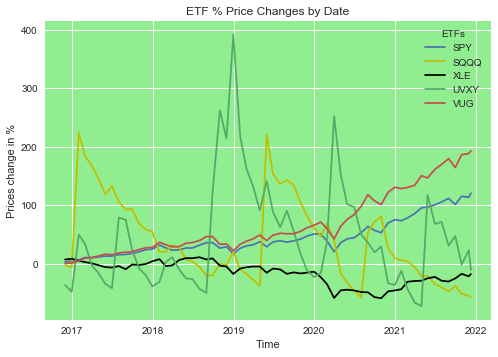

In [18]:
#------------------------------ Graph
plt.style.use('seaborn')
plt.rcParams['axes.facecolor'] = 'lightgreen'
plt.plot(SPY.index, SPY['7. total_%'], label = 'SPY')
plt.plot(SQQQ.index, SQQQ['7. total_%'], label = 'SQQQ', color = 'y')
plt.plot(XLE.index, XLE['7. total_%'], label = 'XLE', color = 'black')
plt.plot(UVXY.index, UVXY['7. total_%'], label = 'UVXY')
plt.plot(VUG.index, VUG['7. total_%'], label = 'VUG')
plt.xlabel('Time')
plt.ylabel('Prices change in %')
plt.title('ETF % Price Changes by Date')
plt.legend(title = "ETFs", frameon = False)

# Results

After the analysis, I concluded that there really was one ETF that performed better than the S&P 500 for the past 10 years. But I also found out that the S&P 500 was far better to invest in than most of the ETFs I took a look at here.

# Discussion

What might the answer imply and why does it matter? How does it fit in with what other researchers have found? What are the perspectives for future research? Survey about the tools investigated for this assignment.

From what we saw, I can say with full confidence that ETFs like the S&P500 and VUG are good assets to invest in. Picking the right place to invest in can be vital to many. Instead of taking the word of people on the news and the internet about which stocks are good investments, we now know that we can look at data and make an objective decision based on that.

Only consistent progress should be prioritized though, as volatile products in the market may be a dangerours path to take, such as it seems to happen with UVXY and SQQQ in this case.

# Thank you very much for your attention.

# Questions?